<a href="https://colab.research.google.com/github/sunha-park/mining/blob/main/%EC%95%84%EB%B9%84%ED%98%812%EC%A1%B0_%EC%84%9C%EC%9A%B8%EC%8B%9C%EC%A4%91%EC%8B%9D%EC%9D%8C%EC%8B%9D%EC%A0%90%ED%8F%90%EC%97%85%EB%A5%A0%EB%B6%84%EB%A5%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyproj
import folium

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus']=False

# 데이터불러오기

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining_아비혁/data/일반음식점1.csv',
                  encoding='utf-8')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining_아비혁/data/일반음식점2.csv',
                  encoding='utf-8')
df = pd.concat([df1, df2], axis = 0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (39,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#데이터 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482302 entries, 0 to 182301
Data columns (total 47 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   번호        482302 non-null  int64  
 1   개방서비스명    482302 non-null  object 
 2   개방서비스아이디  482302 non-null  object 
 3   개방자치단체코드  482302 non-null  int64  
 4   관리번호      482302 non-null  object 
 5   인허가일자     482302 non-null  int64  
 6   인허가취소일자   0 non-null       float64
 7   영업상태구분코드  482302 non-null  int64  
 8   영업상태명     482302 non-null  object 
 9   상세영업상태코드  482302 non-null  int64  
 10  상세영업상태명   482302 non-null  object 
 11  폐업일자      357211 non-null  float64
 12  휴업시작일자    0 non-null       float64
 13  휴업종료일자    0 non-null       float64
 14  재개업일자     0 non-null       float64
 15  소재지전화     328263 non-null  object 
 16  소재지면적     448673 non-null  object 
 17  소재지우편번호   482059 non-null  float64
 18  소재지전체주소   482066 non-null  object 
 19  도로명전체주소   232678 non-null  object 
 20  도로명우

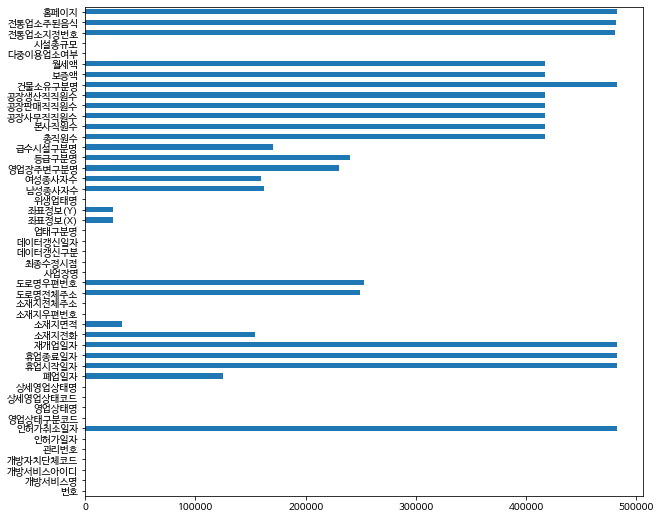

In [ ]:
df.isnull().sum().plot.barh(figsize=(10, 9));

## null값 처리

In [ ]:
df.drop('홈페이지', axis=1, inplace=True)
df.drop('전통업소주된음식', axis=1, inplace=True)
df.drop('전통업소지정번호', axis=1, inplace=True)
df.drop('건물소유구분명', axis=1, inplace=True)
df.drop('월세액', axis=1, inplace=True) #non_null값 모두 0
df.drop('보증액', axis=1, inplace=True) #non_null값 모두 0
df.drop('공장생산직직원수', axis=1, inplace=True)#non_null값 모두 0
df.drop('공장판매직직원수', axis=1, inplace=True)#non_null값 모두 0
df.drop('공장사무직직원수', axis=1, inplace=True)#non_null값 모두 0
df.drop('본사직원수', axis=1, inplace=True)#non_null값 모두 0
df.drop('총직원수', axis=1, inplace=True)
#df.drop('급수시설구분명', axis=1, inplace=True)
#df.drop('등급구분명', axis=1, inplace=True)
#df.drop('영업장주변구분명', axis=1, inplace=True)
df.drop('데이터갱신일자', axis=1, inplace=True)
df.drop('데이터갱신구분', axis=1, inplace=True)
df.drop('최종수정시점', axis=1, inplace=True)
df.drop('도로명우편번호', axis=1, inplace=True)
df.drop('도로명전체주소', axis=1, inplace=True)
df.drop('소재지우편번호', axis=1, inplace=True)
df.drop('소재지전화', axis=1, inplace=True)
df.drop('재개업일자', axis=1, inplace=True)
df.drop('휴업종료일자', axis=1, inplace=True)
df.drop('휴업시작일자', axis=1, inplace=True)
df.drop('인허가취소일자', axis=1, inplace=True)
df.drop('위생업태명', axis=1, inplace=True)
df.drop('상세영업상태코드', axis=1, inplace=True)
df.drop('영업상태명', axis=1, inplace=True)
df.drop('영업상태구분코드', axis=1, inplace=True)
df.drop('관리번호', axis=1, inplace=True)
df.drop('개방자치단체코드', axis=1, inplace=True)
df.drop('개방서비스아이디', axis=1, inplace=True)
df.drop('개방서비스명', axis=1, inplace=True)
df.drop('번호', axis=1, inplace=True)
df.drop('폐업일자', axis=1, inplace=True)

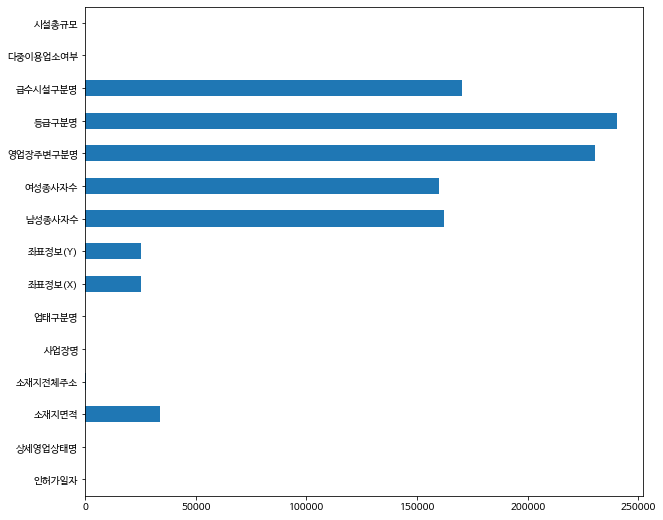

In [ ]:
df.isnull().sum().plot.barh(figsize=(10, 9));

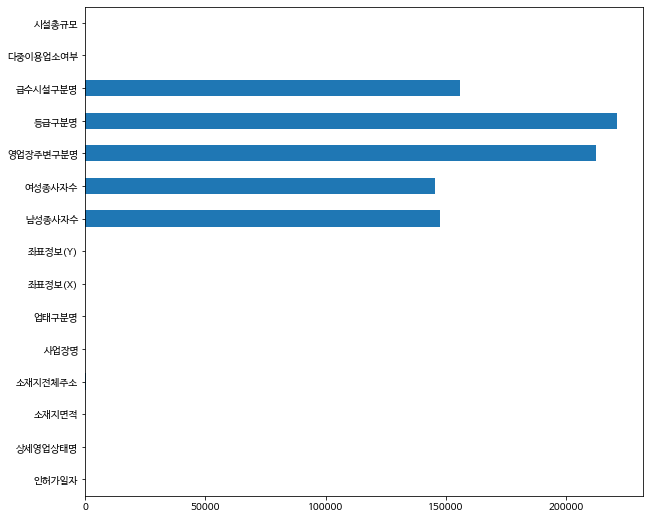

In [ ]:
df = df.dropna(subset=['좌표정보(Y)','소재지면적'])
df.isnull().sum().plot.barh(figsize=(10, 9));

(3,)
(3,)


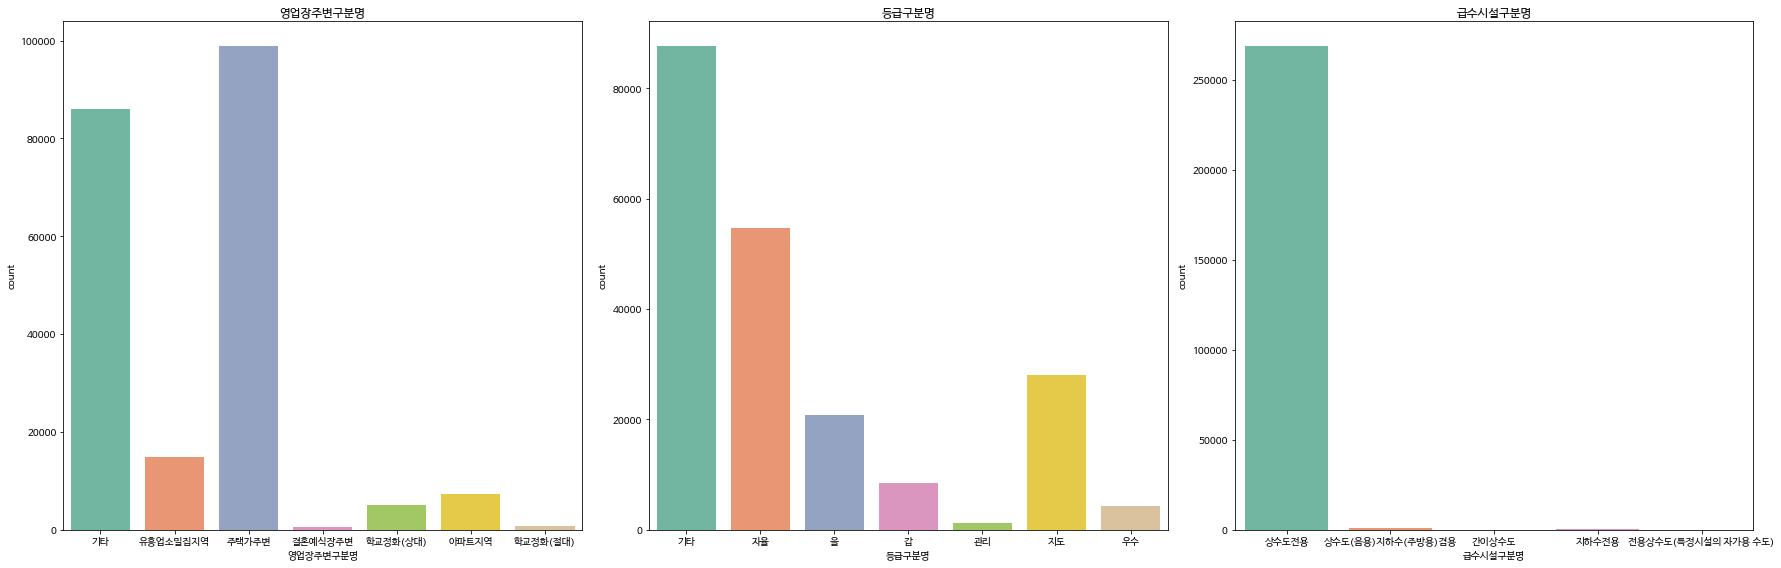

In [ ]:
import seaborn as sns
category_cols = df[['영업장주변구분명','등급구분명', '급수시설구분명']].columns
category_cols
figure, ax_list_list = plt.subplots(1,3);
figure.set_size_inches(25,8)

ax_list = ax_list_list.reshape(3)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=df, x=col, ax=ax_list[i],palette='Set2' )
    ax_list[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
x = ['급수시설구분명','등급구분명','영업장주변구분명']
for i in x:
   print(df[i].value_counts())

상수도전용                  268841
상수도(음용)지하수(주방용)겸용        1076
지하수전용                     274
간이상수도                      94
전용상수도(특정시설의 자가용 수도)         4
Name: 급수시설구분명, dtype: int64
기타    87759
자율    54734
지도    27980
을     20765
갑      8411
우수     4242
관리     1232
Name: 등급구분명, dtype: int64
주택가주변       98957
기타          85902
유흥업소밀집지역    14969
아파트지역        7381
학교정화(상대)     5007
학교정화(절대)      804
결혼예식장주변       627
Name: 영업장주변구분명, dtype: int64


In [ ]:
df['업태구분명'] = df['업태구분명'].fillna('기타')
df['남성종사자수'] = df['남성종사자수'].fillna(0)
df['여성종사자수'] = df['여성종사자수'].fillna(0)
df['영업장주변구분명'] = df['영업장주변구분명'].fillna('기타')
df['등급구분명'] = df['등급구분명'].fillna('기타')
df['급수시설구분명'] = df['급수시설구분명'].fillna('기타')
df.isnull().sum()

인허가일자         0
상세영업상태명       0
소재지면적         0
소재지전체주소     225
사업장명          1
업태구분명         0
좌표정보(X)       0
좌표정보(Y)       0
남성종사자수        0
여성종사자수        0
영업장주변구분명      0
등급구분명         0
급수시설구분명       0
다중이용업소여부      0
시설총규모         0
dtype: int64

In [ ]:
df = df.dropna(subset=['사업장명','소재지전체주소'])
df.isnull().sum()

인허가일자       0
상세영업상태명     0
소재지면적       0
소재지전체주소     0
사업장명        0
업태구분명       0
좌표정보(X)     0
좌표정보(Y)     0
남성종사자수      0
여성종사자수      0
영업장주변구분명    0
등급구분명       0
급수시설구분명     0
다중이용업소여부    0
시설총규모       0
dtype: int64

(3,)
(3,)


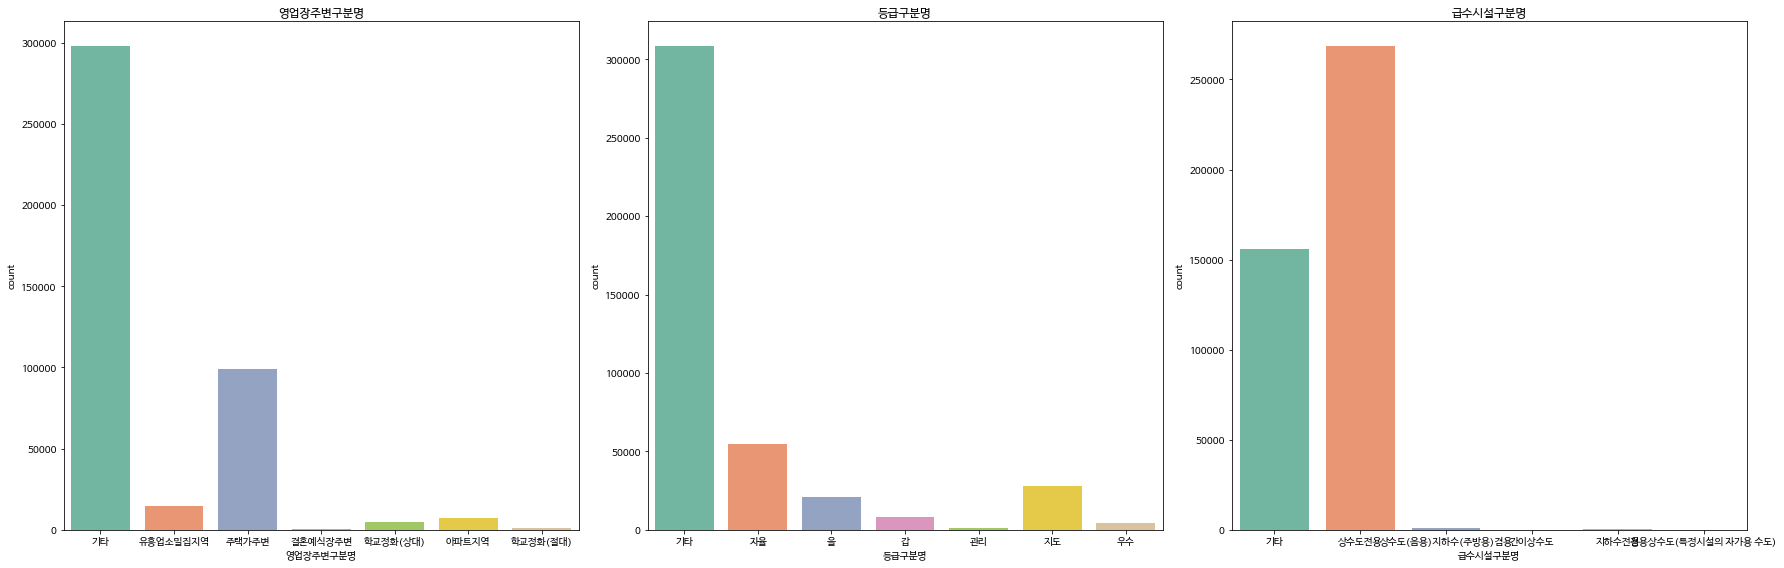

In [ ]:
import seaborn as sns
category_cols = df[['영업장주변구분명','등급구분명', '급수시설구분명']].columns
category_cols
figure, ax_list_list = plt.subplots(1,3);
figure.set_size_inches(25,8)

ax_list = ax_list_list.reshape(3)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=df, x=col, ax=ax_list[i],palette='Set2' )
    ax_list[i].set_title(col)

plt.tight_layout()
plt.show()

##위도,경도 컬럼 추가

In [ ]:
df['좌표정보(X)'] = pd.to_numeric(df['좌표정보(X)'], errors="coerce")
df['좌표정보(Y)'] = pd.to_numeric(df['좌표정보(Y)'], errors="coerce")

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 7], coord[:, 8])
    return np.dstack([fx, fy])[0]

# DataFrame -> NumPy Array 변환
coord = np.array(df)

# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(coord, p1_type, p2_type)

df['경도'] = result[:, 0]
df['위도'] = result[:, 1]
df = pd.DataFrame(df)

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-17-dd61a55ce619>:13: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  fx, fy = pyproj.transform(p1, p2, coord[:, 7], 

In [ ]:
df[['소재지전체주소','경도','위도']]

,소재지전체주소,경도,위도
0,서울특별시 종로구 사직동 9번지 광화문 풍림스페이스본,129.713353,33.466683
1,서울특별시 종로구 신문로1가 135-2번지,129.708014,33.466800
2,서울특별시 종로구 봉익동 6번지,129.712259,33.466707
3,서울특별시 종로구 도렴동 150-1번지,129.709875,33.466759
4,서울특별시 종로구 사직동 262-4번지,129.713890,33.466671
...,...,...,...
182297,서울특별시 강동구 암사동 446-25 구암경로당,129.690231,33.467188
182298,서울특별시 강동구 성내동 534-3번지 102호,129.660568,33.467829
182299,서울특별시 강동구 명일동 162번지,129.680837,33.467391
182300,서울특별시 강동구 길동 383-9 동명빌딩,129.671123,33.467601


## 지역 구 컬럼 추가

In [ ]:
df['지역'] = df['소재지전체주소'].str.split(" ", expand=True)[1]

In [ ]:
df[['소재지전체주소','지역']]

,소재지전체주소,지역
0,서울특별시 종로구 사직동 9번지 광화문 풍림스페이스본,종로구
1,서울특별시 종로구 신문로1가 135-2번지,종로구
2,서울특별시 종로구 봉익동 6번지,종로구
3,서울특별시 종로구 도렴동 150-1번지,종로구
4,서울특별시 종로구 사직동 262-4번지,종로구
...,...,...
182297,서울특별시 강동구 암사동 446-25 구암경로당,강동구
182298,서울특별시 강동구 성내동 534-3번지 102호,강동구
182299,서울특별시 강동구 명일동 162번지,강동구
182300,서울특별시 강동구 길동 383-9 동명빌딩,강동구


###지역 서울시만 남기기

In [ ]:
df['지역'].value_counts()

강남구     43686
송파구     26247
마포구     24048
서초구     23846
영등포구    22289
강동구     20620
관악구     20066
강서구     18715
동대문구    18654
중구      17720
구로구     16784
양천구     15818
중랑구     15629
은평구     15119
서대문구    15047
강북구     13974
노원구     13843
용산구     13724
성북구     13573
성동구     12371
동작구     12074
금천구     12036
도봉구     10236
광진구      5147
종로구      4760
고양시         2
성남시         2
부천시         1
제주시         1
하남시         1
수영구         1
Name: 지역, dtype: int64

In [ ]:
region = df['지역'].isin(['하남시','고양시','성남시','부천시','제주시','수영구'])
df = df[~region]
df['지역'].value_counts()

강남구     43686
송파구     26247
마포구     24048
서초구     23846
영등포구    22289
강동구     20620
관악구     20066
강서구     18715
동대문구    18654
중구      17720
구로구     16784
양천구     15818
중랑구     15629
은평구     15119
서대문구    15047
강북구     13974
노원구     13843
용산구     13724
성북구     13573
성동구     12371
동작구     12074
금천구     12036
도봉구     10236
광진구      5147
종로구      4760
Name: 지역, dtype: int64

##개업월 컬럼 추가

In [ ]:
df['인허가일자']= df['인허가일자'].astype('str')
df['인허가일자'] = pd.to_datetime(df['인허가일자'])
df['개업월'] = df['인허가일자'].dt.strftime('%m')
df['개업월'] = pd.to_numeric(df['개업월'], errors='coerce')

df[['인허가일자','개업월']].head()

,인허가일자,개업월
0,2019-03-05,3
1,2019-03-05,3
2,2019-02-27,2
3,2019-01-11,1
4,2019-01-23,1


##지역별 영업률 파악

In [ ]:
pd.DataFrame(df.groupby(['지역','상세영업상태명'])['상세영업상태명'].count())

상세영업상태명
지역   상세영업상태명         
강남구  영업         12276
     폐업         31410
강동구  영업          4037
     폐업         16583
강북구  영업          3416
     폐업         10558
강서구  영업          5546
     폐업         13169
관악구  영업          4792
     폐업         15274
광진구  영업          3392
     폐업          1755
구로구  영업          4098
     폐업         12686
금천구  영업          2968
     폐업          9068
노원구  영업          3641
     폐업         10202
도봉구  영업          2339
     폐업          7897
동대문구 영업          4220
     폐업         14434
동작구  영업          3167
     폐업          8907
마포구  영업          8166
     폐업         15882
서대문구 영업          3713
     폐업         11334
서초구  영업          5770
     폐업         18076
성동구  영업          3863
     폐업          8508
성북구  영업          3978
     폐업          9595
송파구  영업          7086
     폐업         19161
양천구  영업          3169
     폐업         12649
영등포구 영업          6635
     폐업         15654
용산구  영업          4935
     폐업          8789
은평구  영업          3818
     폐업         11301
종로구  영업          3304
     폐업          1456
중구   영업          6129
     폐업         11591
중랑구  영업          3755
     폐업         11874

In [ ]:
data = pd.DataFrame(df.groupby(['지역','상세영업상태명'])['상세영업상태명'].count() / df.groupby(['지역'])['지역'].count())
data = data.reset_index()
display(data.head(3))
data = data.rename(columns = {0: '상세영업상태비율'})
display(data.head(3))

,지역,상세영업상태명,0
0,강남구,영업,0.281005
1,강남구,폐업,0.718995
2,강동구,영업,0.195781


,지역,상세영업상태명,상세영업상태비율
0,강남구,영업,0.281005
1,강남구,폐업,0.718995
2,강동구,영업,0.195781


##지역별 폐업률 파악

In [ ]:
df1 = data[data['상세영업상태명'] == '폐업'].sort_values(by = '상세영업상태비율')
display(df1.head(3))
df1 = df1.rename(columns = {'상세영업상태비율':'폐업률'})
df1 = df1.drop(['상세영업상태명'],axis = 1)
display(df1.head(3))

new_data = pd.merge(df, df1, on='지역', how='inner')
new_data.head(1)

,지역,상세영업상태명,상세영업상태비율
45,종로구,폐업,0.305882
11,광진구,폐업,0.340975
41,용산구,폐업,0.640411


,지역,폐업률
45,종로구,0.305882
11,광진구,0.340975
41,용산구,0.640411


,인허가일자,상세영업상태명,소재지면적,소재지전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,다중이용업소여부,시설총규모,경도,위도,지역,개업월,폐업률
0,2019-03-05,영업,60.15,서울특별시 종로구 사직동 9번지 광화문 풍림스페이스본,호센,일식,197181.393302,452458.826652,0.0,0.0,기타,기타,기타,N,60.15,129.713353,33.466683,종로구,3,0.305882


##지역별 식당종류 파악

In [ ]:
new_data['업태구분명'].value_counts()

한식                 179151
분식                  65939
경양식                 42018
기타                  33686
호프/통닭               32457
일식                  16676
중국식                 13553
정종/대포집/소주방          11105
통닭(치킨)               8917
까페                   7250
패스트푸드                3593
뷔페식                  2493
외국음식전문점(인도,태국등)      2113
식육(숯불구이)             1480
김밥(도시락)              1459
횟집                   1418
전통찻집                  624
탕류(보신용)               391
감성주점                  367
출장조리                  341
라이브카페                 293
패밀리레스트랑               250
냉면집                   150
복어취급                  110
키즈카페                  101
이동조리                   79
커피숍                     4
기타 휴게음식점                3
다방                      1
식품소분업                   1
식품등 수입판매업               1
일반조리판매                  1
제과점영업                   1
Name: 업태구분명, dtype: int64

###중식식당비율

In [ ]:
data = pd.DataFrame(new_data.groupby(['지역','업태구분명'])['업태구분명'].count() / new_data.groupby(['지역'])['지역'].count())
data = data.reset_index()
display(data.head(3))
data = data.rename(columns = {0:'중식식당비율'})
df2 = data[data['업태구분명'] == '중국식'].sort_values(by='중식식당비율')
display(df2.head(3))
df2 = df2.drop(['업태구분명'],axis = 1)
display(df2.head(3))

new_data = pd.merge(new_data, df2, on='지역', how='inner')

,지역,업태구분명,0
0,강남구,감성주점,0.002243
1,강남구,경양식,0.251888
2,강남구,기타,0.063819


,지역,업태구분명,중식식당비율
448,송파구,중국식,0.023965
524,용산구,중국식,0.024701
66,강북구,중국식,0.025047


,지역,중식식당비율
448,송파구,0.023965
524,용산구,0.024701
66,강북구,0.025047


In [ ]:
df3 = new_data[['지역','상세영업상태명','업태구분명']]
df3.head(3)
df4 = df3[(df3['업태구분명']=='중국식')]
display(df4.head(3))

,지역,상세영업상태명,업태구분명
25,종로구,영업,중국식
28,종로구,영업,중국식
39,종로구,영업,중국식


In [ ]:
df4 = pd.DataFrame(df4.groupby(['지역','상세영업상태명'])['상세영업상태명'].count() /df3.groupby(['지역'])['지역'].count())
df4 = df4.reset_index()
display(df4.head(3))
df4 = df4[df4['상세영업상태명'] == '폐업'].sort_values(by=0)
df4 = df4.rename(columns = {0:'중식식당폐업률'})
df4 = df4.drop(['상세영업상태명'],axis = 1)
display(df4.head(3))

,지역,상세영업상태명,0
0,강남구,영업,0.008813
1,강남구,폐업,0.017603
2,강동구,영업,0.006887


,지역,중식식당폐업률
45,종로구,0.007563
11,광진구,0.013794
41,용산구,0.014282


##chinese

In [ ]:
chinese = pd.merge(new_data, df4, on='지역', how='inner')
chinese = chinese[chinese['업태구분명']=='중국식']
chinese.head(3)

,인허가일자,상세영업상태명,소재지면적,소재지전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),남성종사자수,여성종사자수,...,급수시설구분명,다중이용업소여부,시설총규모,경도,위도,지역,개업월,폐업률,중식식당비율,중식식당폐업률
25,2022-04-21,영업,40.80,서울특별시 종로구 묘동 15 1층,종가집 짬뽕,중국식,199206.260165,452307.124491,0.0,0.0,...,상수도전용,N,40.80,129.711723,33.466719,종로구,4,0.305882,0.027731,0.007563
28,2022-04-20,영업,267.10,"서울특별시 종로구 관철동 14-3 수지빌딩 1, 2층",용용선생 종각점,중국식,198744.767994,451930.939476,0.0,0.0,...,상수도전용,Y,267.10,129.707680,33.466807,종로구,4,0.305882,0.027731,0.007563
39,2019-03-28,영업,85.51,서울특별시 종로구 공평동 17번지,딩딤1968 종각센트로폴리스점,중국식,198455.044564,452160.147109,0.0,0.0,...,기타,N,85.51,129.710143,33.466753,종로구,3,0.305882,0.027731,0.007563


In [ ]:
chinese.shape

(13553, 22)

###파생변수 추가

####프랜차이점여부

In [ ]:
dup = chinese.duplicated(['사업장명'])
chinese = pd.concat([chinese, dup], axis=1)
chinese.rename(columns = {0 : '프랜차이점여부'}, inplace = True)
display(chinese.head())

,인허가일자,상세영업상태명,소재지면적,소재지전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),남성종사자수,여성종사자수,...,다중이용업소여부,시설총규모,경도,위도,지역,개업월,폐업률,중식식당비율,중식식당폐업률,프랜차이점여부
25,2022-04-21,영업,40.80,서울특별시 종로구 묘동 15 1층,종가집 짬뽕,중국식,199206.260165,452307.124491,0.0,0.0,...,N,40.80,129.711723,33.466719,종로구,4,0.305882,0.027731,0.007563,False
28,2022-04-20,영업,267.10,"서울특별시 종로구 관철동 14-3 수지빌딩 1, 2층",용용선생 종각점,중국식,198744.767994,451930.939476,0.0,0.0,...,Y,267.10,129.707680,33.466807,종로구,4,0.305882,0.027731,0.007563,False
39,2019-03-28,영업,85.51,서울특별시 종로구 공평동 17번지,딩딤1968 종각센트로폴리스점,중국식,198455.044564,452160.147109,0.0,0.0,...,N,85.51,129.710143,33.466753,종로구,3,0.305882,0.027731,0.007563,False
65,2019-03-14,영업,243.54,서울특별시 종로구 공평동 5-1번지,라오베이징,중국식,198481.412658,452177.123807,0.0,0.0,...,Y,243.54,129.710326,33.466749,종로구,3,0.305882,0.027731,0.007563,False
127,1988-08-10,영업,73.44,서울특별시 종로구 낙원동 198 (지상2층),보화장,중국식,199004.152268,452067.893280,3.0,0.0,...,N,73.44,129.709153,33.466802,종로구,8,0.305882,0.027731,0.007563,False


In [ ]:
chinese['프랜차이점여부'].value_counts()

False    8246
True     5307
Name: 프랜차이점여부, dtype: int64

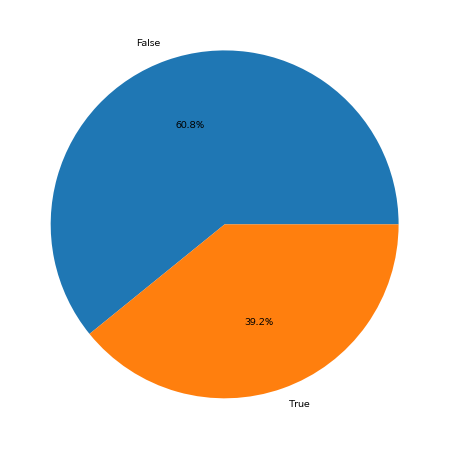

In [ ]:
x = chinese['프랜차이점여부'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (10,8))
plt.pie(y, labels = x1,  autopct='%1.1f%%')
plt.show()

####마라탕전문집여부

In [ ]:
import pandas as pd

# 포함하고자 하는 문자열 리스트 생성
maratang_list = [
    '하이디라오','신룽푸','라화쿵부',
    '소림마라','라와','라향각','쿵푸 중식방','쿵푸중식방'
    '라메이즈','중경','춘리','탕화쿵푸',
    '희래식당','왕푸징','루비정','매운향솥',
    '차알','Sogak','천진영감','라공방','홍마방',
    '백미원','천향록','중림동기내식','마르르','시래식당'
    ,'마라'
    ]


# join함수를 이용하여 이어주고 contains 함수에 넣기
maratang = '|'.join(maratang_list)
mara = chinese[chinese['사업장명'].str.contains(maratang)]

In [ ]:
chinese['마라탕전문집']=chinese['사업장명'].str.contains(maratang)
chinese['마라탕전문집'].value_counts()

False    12821
True       732
Name: 마라탕전문집, dtype: int64

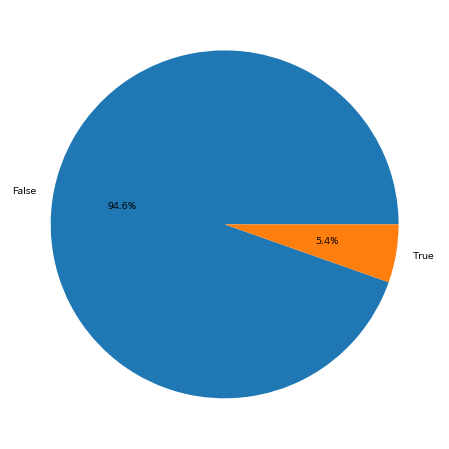

In [ ]:
x = chinese['마라탕전문집'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (10,8))
plt.pie(y, labels = x1,  autopct='%1.1f%%')
plt.show()

###추가데이터병합

In [ ]:
columns = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining_아비혁/data/column.csv',
                  encoding='utf-8')
df_mil = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining_아비혁/data/주민등록인구_20221204194524.csv',
                  encoding='utf-8')
display(columns.head(3))
display(df_mil.head(3))

,지역,면적,횡당보도 개수,지하철 개수,면적 대비 횡당보도 개수,면적 대비 지하철 개수
0,서초구,47.0,1564,12,33.276596,0.255319
1,강서구,41.5,1649,9,39.734940,0.216867
2,강남구,39.5,2062,21,52.202532,0.531646


,지역,세대,계,한국인,등록외국인,세대당인구,65세이상고령자,면적 (km²),인구밀도,한국인밀도,외국인밀도,65세이상고령자밀도
0,소계,4450525,9682126,9450768,231358,2.12,1650367,605.24,15997.168070,15614.909790,382.258278,2726.797634
1,종로구,72797,151999,141978,10021,1.95,27787,23.91,6357.130908,5938.017566,419.113342,1162.149728
2,중구,63300,130764,120969,9795,1.91,24841,9.96,13128.915660,12145.481930,983.433735,2494.076305


In [ ]:
df_mil = df_mil.drop([df_mil.index[0]])
display(df_mil.head(3))

,지역,세대,계,한국인,등록외국인,세대당인구,65세이상고령자,면적 (km²),인구밀도,한국인밀도,외국인밀도,65세이상고령자밀도
1,종로구,72797,151999,141978,10021,1.95,27787,23.91,6357.130908,5938.017566,419.113342,1162.149728
2,중구,63300,130764,120969,9795,1.91,24841,9.96,13128.915660,12145.481930,983.433735,2494.076305
3,용산구,109954,233734,219275,14459,1.99,38784,21.87,10687.425700,10026.291720,661.133974,1773.388203


In [ ]:
chinese = pd.merge(chinese, columns, on='지역', how='inner')
chinese = pd.merge(chinese, df_mil, on='지역', how='inner')

###필요없는컬럼삭제

In [ ]:
chinese.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13553 entries, 0 to 13552
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   인허가일자          13553 non-null  datetime64[ns]
 1   상세영업상태명        13553 non-null  object        
 2   소재지면적          13553 non-null  object        
 3   소재지전체주소        13553 non-null  object        
 4   사업장명           13553 non-null  object        
 5   업태구분명          13553 non-null  object        
 6   좌표정보(X)        13553 non-null  float64       
 7   좌표정보(Y)        13553 non-null  float64       
 8   남성종사자수         13553 non-null  float64       
 9   여성종사자수         13553 non-null  float64       
 10  영업장주변구분명       13553 non-null  object        
 11  등급구분명          13553 non-null  object        
 12  급수시설구분명        13553 non-null  object        
 13  다중이용업소여부       13553 non-null  object        
 14  시설총규모          13553 non-null  float64       
 15  경도             1355

In [ ]:
chinese.drop('소재지면적', axis=1, inplace=True) #시설총규모와 같은 의미인 컬럼
chinese.drop('65세이상고령자', axis=1, inplace=True)
chinese.drop('등록외국인', axis=1, inplace=True)
chinese.drop('세대당인구', axis=1, inplace=True)
chinese.drop('한국인', axis=1, inplace=True)
chinese.drop('계', axis=1, inplace=True)
chinese.drop('세대', axis=1, inplace=True)
chinese.drop('지하철 개수', axis=1, inplace=True)
chinese.drop('횡당보도 개수', axis=1, inplace=True)
chinese.drop('면적', axis=1, inplace=True)

##df = chinese

In [ ]:
df = chinese.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13553 entries, 0 to 13552
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   인허가일자          13553 non-null  datetime64[ns]
 1   상세영업상태명        13553 non-null  object        
 2   소재지전체주소        13553 non-null  object        
 3   사업장명           13553 non-null  object        
 4   업태구분명          13553 non-null  object        
 5   좌표정보(X)        13553 non-null  float64       
 6   좌표정보(Y)        13553 non-null  float64       
 7   남성종사자수         13553 non-null  float64       
 8   여성종사자수         13553 non-null  float64       
 9   영업장주변구분명       13553 non-null  object        
 10  등급구분명          13553 non-null  object        
 11  급수시설구분명        13553 non-null  object        
 12  다중이용업소여부       13553 non-null  object        
 13  시설총규모          13553 non-null  float64       
 14  경도             13553 non-null  float64       
 15  위도             1355

###범주형 변수 수치형으로 변환

In [ ]:
df['지역'] = df['지역'].replace(
    ['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구',
     '도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구',
     '양천구','영등포구','용산구','은평구','종로구','중구','중랑구'],
     [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
                                      

In [ ]:
def 상세영업상태명(x) :
    if x == "영업":
        return 1
    elif x == "폐업":
        return 0

chinese['상세영업상태명'] = chinese["상세영업상태명"].apply(상세영업상태명)

def 프랜차이점여부(x) :
    if x == True:
        return 1
    elif x == False:
        return 0

chinese['프랜차이점여부'] = chinese["프랜차이점여부"].apply(프랜차이점여부)

def 마라탕전문집(x) :
    if x == True:
        return 1
    elif x == False:
        return 0

df['마라탕전문집'] = df["마라탕전문집"].apply(마라탕전문집)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13553 entries, 0 to 13552
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   인허가일자          13553 non-null  datetime64[ns]
 1   상세영업상태명        13553 non-null  object        
 2   소재지전체주소        13553 non-null  object        
 3   사업장명           13553 non-null  object        
 4   업태구분명          13553 non-null  object        
 5   좌표정보(X)        13553 non-null  float64       
 6   좌표정보(Y)        13553 non-null  float64       
 7   남성종사자수         13553 non-null  float64       
 8   여성종사자수         13553 non-null  float64       
 9   영업장주변구분명       13553 non-null  object        
 10  등급구분명          13553 non-null  object        
 11  급수시설구분명        13553 non-null  object        
 12  다중이용업소여부       13553 non-null  object        
 13  시설총규모          13553 non-null  float64       
 14  경도             13553 non-null  float64       
 15  위도             1355

###범주형 변수 한눈 비교

In [ ]:
category_cols = df[['영업장주변구분명','등급구분명', '급수시설구분명', '다중이용업소여부']].columns
category_cols

Index(['영업장주변구분명', '등급구분명', '급수시설구분명', '다중이용업소여부'], dtype='object')

(2, 2)
(4,)


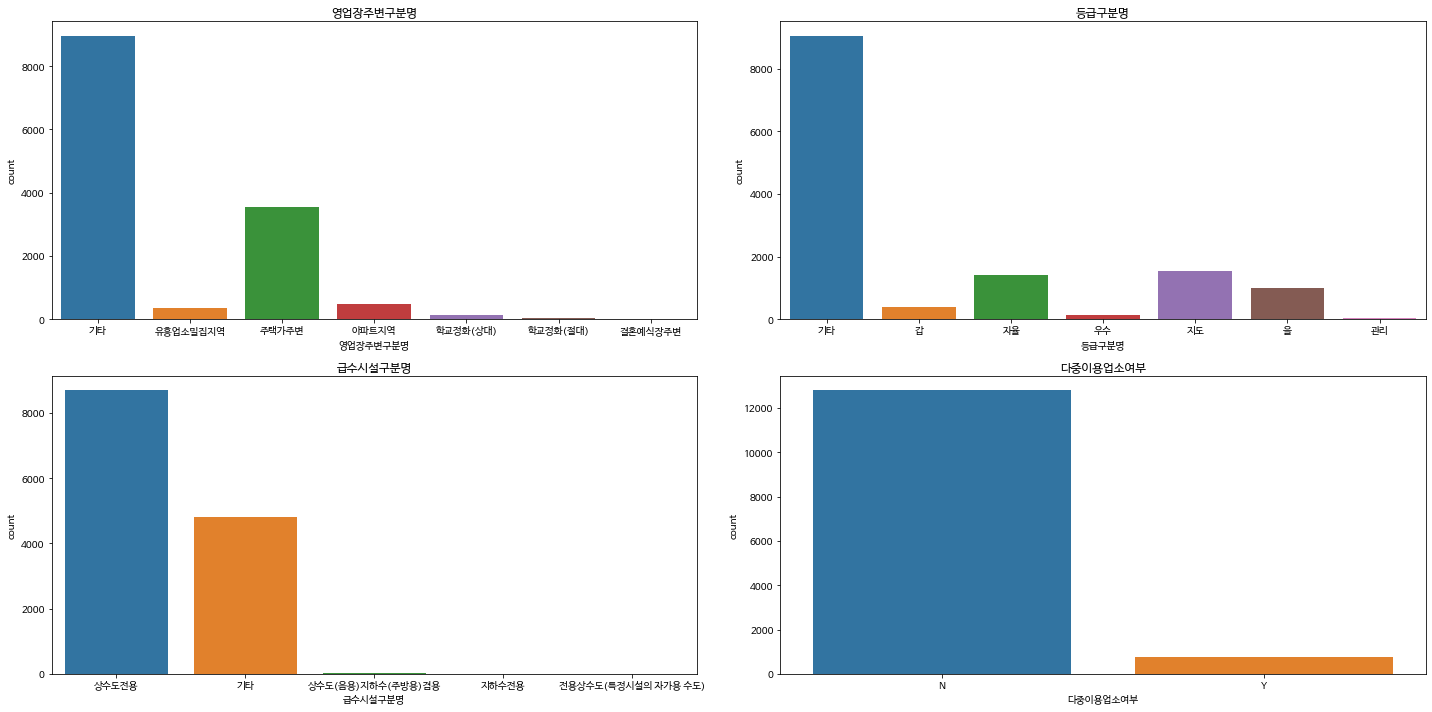

In [ ]:
import seaborn as sns

figure, ax_list_list = plt.subplots(2,2);
figure.set_size_inches(20,10)
#as_list_list[3][3]

ax_list = ax_list_list.reshape(4)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=df, x=col, ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()
plt.show()

###범주형 변수 수치형으로 변환2

In [ ]:
df['영업장주변구분명'] = df['영업장주변구분명'].replace(
    ['기타','주택가주변','아파트지역','유흥업소밀집지역','학교정화(상대)','학교정화(절대)','결혼예식장주변'],
    [1,2,3,4,5,6,7])
df['등급구분명'] = df['등급구분명'].replace(
    ['기타','지도','자율','을','갑','우수','관리'],
    [1,2,3,4,5,6,7])
df['급수시설구분명'] = df['급수시설구분명'].replace(
    ['상수도전용','기타','상수도(음용)지하수(주방용)겸용','지하수전용','전용상수도(특정시설의 자가용 수도)'],
    [1,2,3,4,5])
df['다중이용업소여부'] =df['다중이용업소여부'].replace(['N','Y'],[0,1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13553 entries, 0 to 13552
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   인허가일자          13553 non-null  datetime64[ns]
 1   상세영업상태명        13553 non-null  object        
 2   소재지전체주소        13553 non-null  object        
 3   사업장명           13553 non-null  object        
 4   업태구분명          13553 non-null  object        
 5   좌표정보(X)        13553 non-null  float64       
 6   좌표정보(Y)        13553 non-null  float64       
 7   남성종사자수         13553 non-null  float64       
 8   여성종사자수         13553 non-null  float64       
 9   영업장주변구분명       13553 non-null  int64         
 10  등급구분명          13553 non-null  int64         
 11  급수시설구분명        13553 non-null  int64         
 12  다중이용업소여부       13553 non-null  int64         
 13  시설총규모          13553 non-null  float64       
 14  경도             13553 non-null  float64       
 15  위도             1355

#데이터나누기

In [ ]:
X1 = df[['영업장주변구분명','등급구분명', '급수시설구분명', '다중이용업소여부','프랜차이점여부', '마라탕전문집']]
X2 = df[['시설총규모', '남성종사자수', '여성종사자수',
         '지역', '개업월', '폐업률', '중식식당비율', '중식식당폐업률',
         '면적 (km²)', '면적 대비 횡당보도 개수','면적 대비 지하철 개수',
         '인구밀도', '한국인밀도', '외국인밀도', '65세이상고령자밀도']]
y = df['상세영업상태명']

## 연속형 특성의 Scaling

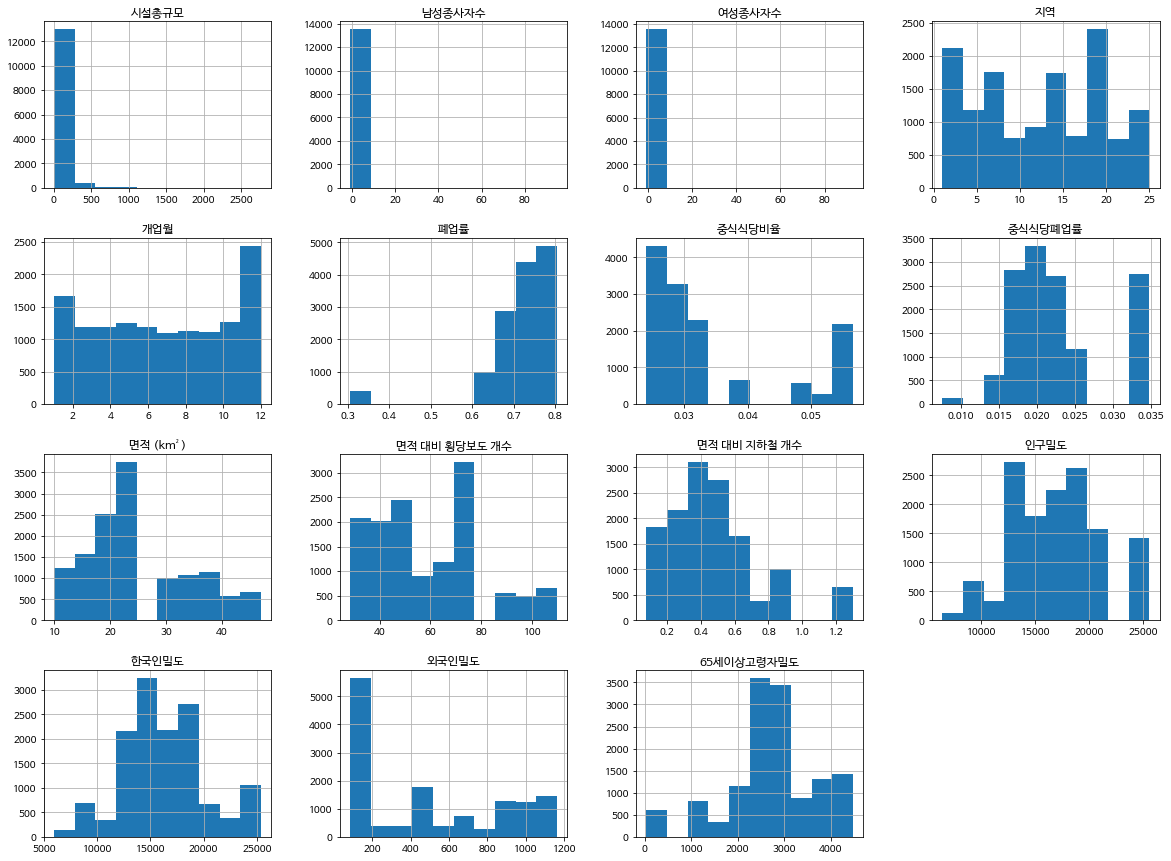

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(X2).hist(figsize=(20,15));

### Standardization 스케일링

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13553 entries, 0 to 13552
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시설총규모          13553 non-null  float64
 1   남성종사자수         13553 non-null  float64
 2   여성종사자수         13553 non-null  float64
 3   지역             13553 non-null  int64  
 4   개업월            13553 non-null  int64  
 5   폐업률            13553 non-null  float64
 6   중식식당비율         13553 non-null  float64
 7   중식식당폐업률        13553 non-null  float64
 8   면적 (km²)       13553 non-null  float64
 9   면적 대비 횡당보도 개수  13553 non-null  float64
 10  면적 대비 지하철 개수   13553 non-null  float64
 11  인구밀도           13553 non-null  float64
 12  한국인밀도          13553 non-null  float64
 13  외국인밀도          13553 non-null  float64
 14  65세이상고령자밀도     13553 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 2.2 MB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X2)
X_scaled=scaler.transform(X2)
display(pd.DataFrame(X_scaled).describe()) #정규분포로 정규화

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1.355300e+04,1.355300e+04,1.355300e+04,1.355300e+04,1.355300e+04,1.355300e+04,1.355300e+04,1.355300e+04,1.355300e+04,13553.000000,1.355300e+04,1.355300e+04,1.355300e+04,1.355300e+04,1.355300e+04
mean,5.032989e-17,-4.613573e-17,1.782517e-17,1.342130e-16,-2.201933e-17,-3.690859e-16,-6.375120e-16,2.516495e-16,3.355326e-17,0.000000,-1.090481e-16,-4.865223e-16,2.935910e-16,-3.355326e-17,3.019794e-16
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-7.373040e-01,-7.787640e-01,-8.207099e-01,-1.533674e+00,-1.718227e+00,-5.193255e+00,-9.566775e-01,-2.425363e+00,-1.576708e+00,-1.438805,-1.426529e+00,-2.519798e+00,-2.567245e+00,-1.092062e+00,-2.795797e+00
25%,-4.629950e-01,-2.681405e-01,-2.223409e-01,-8.558810e-01,-8.255552e-01,-2.166994e-01,-6.758474e-01,-7.322958e-01,-7.965504e-01,-0.835221,-6.668165e-01,-7.231186e-01,-6.516629e-01,-9.686794e-01,-4.359898e-01
50%,-2.641056e-01,-2.681405e-01,-2.223409e-01,9.302967e-02,6.711670e-02,2.183876e-01,-4.184079e-01,-2.664829e-01,-1.577770e-01,-0.080474,-1.034727e-01,-1.607732e-01,-1.450125e-01,-1.685993e-01,3.096142e-02
75%,5.473358e-02,-2.681405e-01,-2.223409e-01,9.063817e-01,9.597886e-01,4.826541e-01,2.448615e-01,3.449187e-01,8.563268e-01,0.537194,3.783716e-01,6.507133e-01,7.506380e-01,1.102681e+00,4.914090e-01
max,2.362665e+01,4.824110e+01,5.542598e+01,1.719734e+00,1.554903e+00,1.062468e+00,2.039822e+00,2.016092e+00,2.188800e+00,2.430504,3.058661e+00,2.062956e+00,2.197735e+00,1.720652e+00,1.814544e+00


In [ ]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns=['시설총규모', '남성종사자수', '여성종사자수',
                  '지역', '개업월', '폐업률', '중식식당비율', '중식식당폐업률',
                  '면적 (km²)', '면적 대비 횡당보도 개수','면적 대비 지하철 개수',
                  '인구밀도', '한국인밀도', '외국인밀도', '65세이상고령자밀도']

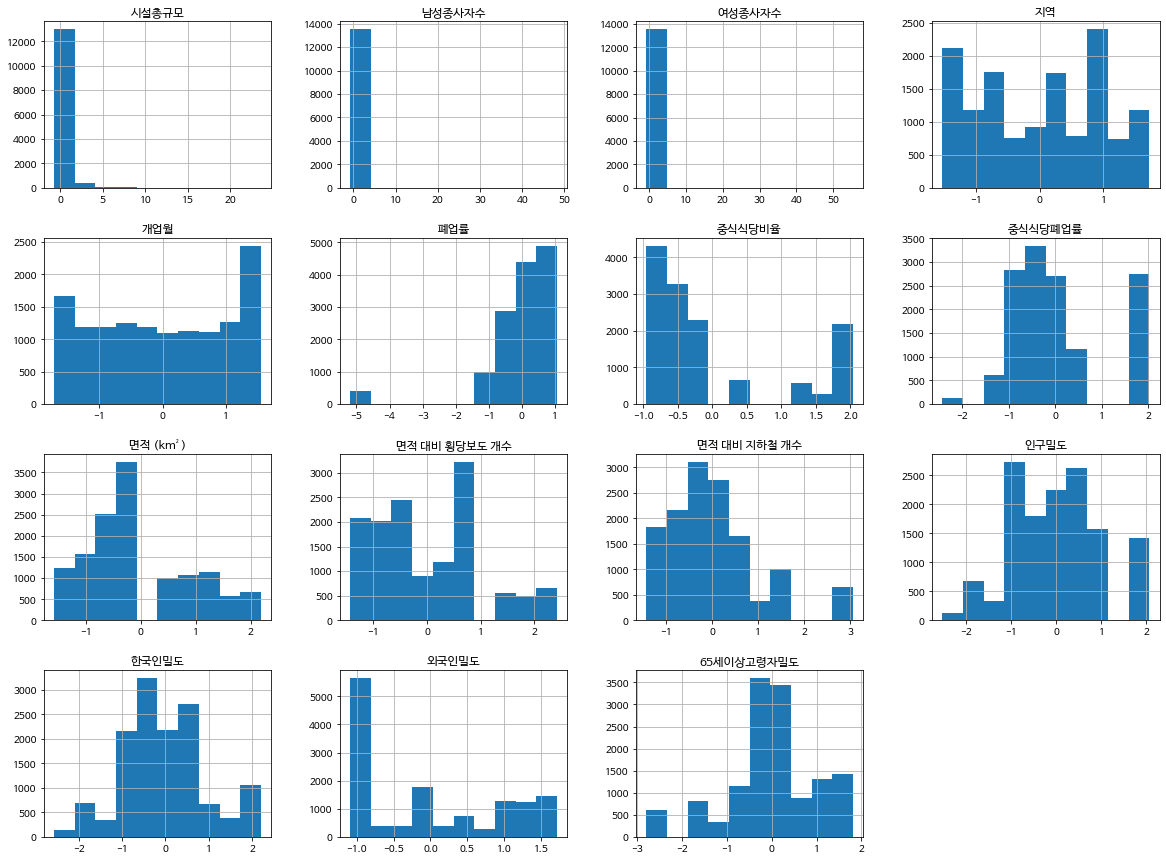

In [ ]:
pd.DataFrame(X_scaled).hist(figsize=(20,15));

#x,y 병합데이터 df

In [ ]:
df=pd.concat([X1, X_scaled, y], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13553 entries, 0 to 13552
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   영업장주변구분명       13553 non-null  int64  
 1   등급구분명          13553 non-null  int64  
 2   급수시설구분명        13553 non-null  int64  
 3   다중이용업소여부       13553 non-null  int64  
 4   프랜차이점여부        13553 non-null  bool   
 5   마라탕전문집         13553 non-null  int64  
 6   시설총규모          13553 non-null  float64
 7   남성종사자수         13553 non-null  float64
 8   여성종사자수         13553 non-null  float64
 9   지역             13553 non-null  float64
 10  개업월            13553 non-null  float64
 11  폐업률            13553 non-null  float64
 12  중식식당비율         13553 non-null  float64
 13  중식식당폐업률        13553 non-null  float64
 14  면적 (km²)       13553 non-null  float64
 15  면적 대비 횡당보도 개수  13553 non-null  float64
 16  면적 대비 지하철 개수   13553 non-null  float64
 17  인구밀도           13553 non-null  float64
 18  한국인밀도 

#데이터셋나누기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13553 entries, 0 to 13552
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   영업장주변구분명       13553 non-null  int64  
 1   등급구분명          13553 non-null  int64  
 2   급수시설구분명        13553 non-null  int64  
 3   다중이용업소여부       13553 non-null  int64  
 4   프랜차이점여부        13553 non-null  bool   
 5   마라탕전문집         13553 non-null  int64  
 6   시설총규모          13553 non-null  float64
 7   남성종사자수         13553 non-null  float64
 8   여성종사자수         13553 non-null  float64
 9   지역             13553 non-null  float64
 10  개업월            13553 non-null  float64
 11  폐업률            13553 non-null  float64
 12  중식식당비율         13553 non-null  float64
 13  중식식당폐업률        13553 non-null  float64
 14  면적 (km²)       13553 non-null  float64
 15  면적 대비 횡당보도 개수  13553 non-null  float64
 16  면적 대비 지하철 개수   13553 non-null  float64
 17  인구밀도           13553 non-null  float64
 18  한국인밀도 

In [ ]:
X = df.iloc[:,:21]
y = df.iloc[:,21]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify = y, random_state=42 )

#SVM

##Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
#파라미터 조정
param_distribs={'kernel': ['rbf']}

In [ ]:
from sklearn.svm import SVC
random_search=RandomizedSearchCV(SVC(), param_distributions=param_distribs, cv=5, return_train_score=True, random_state = 42)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'kernel': ['rbf']}, random_state=42,
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'kernel': 'rbf'}
Best Cross-validity Score: 0.733
Test set Score: 0.736


##모델 평가

In [ ]:
from sklearn.svm import SVC
svc1=SVC()
svc1.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import confusion_matrix

pred_train=svc1.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test=svc1.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

훈련데이터 오차행렬:
 [[6037  722]
 [1878 1527]]
테스트데이터 오차행렬:
 [[1972  282]
 [ 614  521]]


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

f1=f1_score(y_test, pred_test)
print("f1 score:\n", f1,'\n')

cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

f1 score:
 0.5376676986584108 

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      2254
           1       0.65      0.46      0.54      1135

    accuracy                           0.74      3389
   macro avg       0.71      0.67      0.68      3389
weighted avg       0.72      0.74      0.72      3389



#Random Forest

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_features': ['auto', 'sqrt', 'log2']}

grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'log2'}
Best Cross-validity Score: 0.719
Test set Score: 0.713


##Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
param_distribs = {'max_features': ['auto', 'sqrt', 'log2']}

random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'sqrt'}
Best Cross-validity Score: 0.720
Test set Score: 0.719


##변수 중요도

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_features='sqrt')
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.04917909 0.04221059 0.05297235 0.02692093 0.39785817 0.03035796
 0.02474086 0.01114713 0.18829282 0.01575995 0.01134691 0.01618154
 0.03296059 0.02973119 0.00946018 0.01075087 0.01050701 0.00948767
 0.01033233 0.0105514  0.00925046]


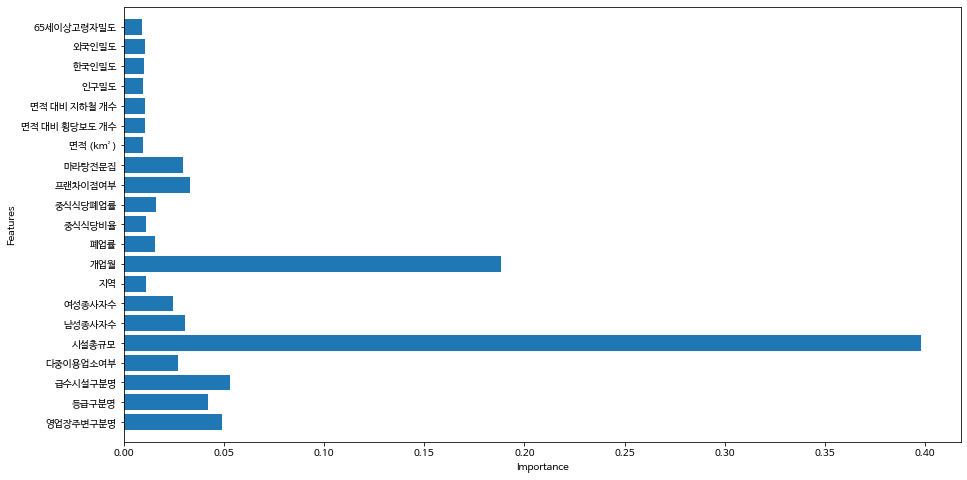

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.figure(figsize = (15,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_forest(Forest)

In [ ]:
df4 = df4.reset_index()
display(df4.head(3))
df4 = df4[df4['상세영업상태명'] == '폐업'].sort_values(by=0)
df4 = df4.rename(columns = {0:'중식식당폐업률'})
df4 = df4.drop(['상세영업상태명'],axis = 1)
display(df4.head(3))

In [ ]:
data1 = pd.DataFrame(chinese.groupby(['개업월','마라탕전문집','상세영업상태명'])['상세영업상태명'].count())

data1 = data1.rename(columns = {'상세영업상태명':'폐업'})
data1 = data1.reset_index()
display(data1.head(3))

data2 =  pd.DataFrame(data1[data1['상세영업상태명']==0])
display(data2)

,개업월,마라탕전문집,상세영업상태명,폐업
0,1,0,0,512
1,1,0,1,247
2,1,1,0,19


,개업월,마라탕전문집,상세영업상태명,폐업
0,1,0,0,512
2,1,1,0,19
4,2,0,0,564
6,2,1,0,9
8,3,0,0,814
10,3,1,0,10
12,4,0,0,794
14,4,1,0,9
16,5,0,0,820
18,5,1,0,9


In [ ]:
data3 =  pd.DataFrame(data2[data2['마라탕전문집']==0])
data3.head(3)

,개업월,마라탕전문집,상세영업상태명,폐업
0,1,0,0,512
4,2,0,0,564
8,3,0,0,814


In [ ]:
data4 =  pd.DataFrame(data2[data2['마라탕전문집']==1])
data4.head(3)

,개업월,마라탕전문집,상세영업상태명,폐업
2,1,1,0,19
6,2,1,0,9
10,3,1,0,10


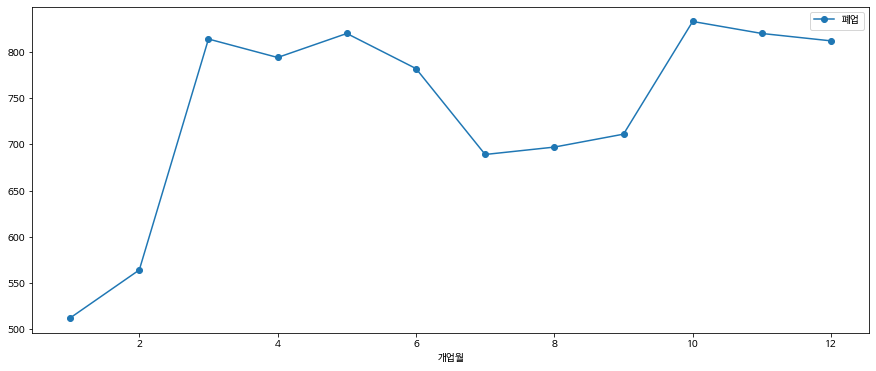

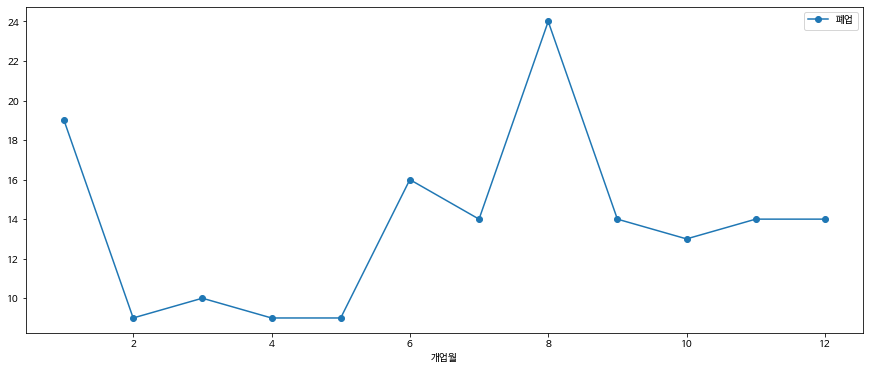

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
data3.plot(x = '개업월',y = '폐업',marker='o');
data4.plot(x = '개업월',y = '폐업',marker='o')
plt.xticks(rotation=0);
plt.show()

##모델 평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Forest=RandomForestClassifier(max_features='sqrt')
Forest.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [ ]:
from sklearn.metrics import confusion_matrix

pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

훈련데이터 오차행렬:
 [[6742   17]
 [  14 3391]]
테스트 데이터 오차행렬:
 [[1845  409]
 [ 548  587]]


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

f1=f1_score(y_test, pred_test, average="micro" )
print("micro f1 score : \n", f1,'\n')
f2=f1_score(y_test, pred_test, average="macro" )
print("macro f1 score : \n", f2,'\n')

cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트 : \n", cfreport)

micro f1 score : 
 0.7176158158748894 

macro f1 score : 
 0.6724878738314997 

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      2254
           1       0.59      0.52      0.55      1135

    accuracy                           0.72      3389
   macro avg       0.68      0.67      0.67      3389
weighted avg       0.71      0.72      0.71      3389

